## LONDON BIKE SHARING 

Source data : https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset

IMPORT LIBRARY

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
#Membaca file CSV
df = pd.read_csv("/content/drive/My Drive/data/london_merged.csv",parse_dates=['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


EXPLORATORY DATA ANALYSIS

In [5]:
#Info Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [6]:
#Cek dataframe NULL
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [7]:
#describe dataframe
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


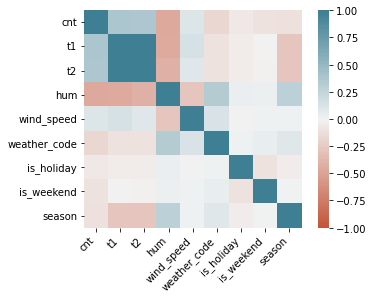

In [8]:
#Matrix Korelasi
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Keterangan kolom 
1. "timestamp" - timestamp field for grouping the data
1. "cnt" - the count of a new bike shares
1. "t1" - real temperature in C
1. "t2" - temperature in C "feels like"
1. "hum" - humidity in percentage
1. "windspeed" - wind speed in km/h
1. "weathercode" - category of the weather
1. "isholiday" - boolean field - 1 holiday / 0 non holiday
1. "isweekend" - boolean field - 1 if the day is weekend
1. "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

1. "weather_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

SET INDEX DATETIME

In [9]:
dates = pd.to_datetime(df['timestamp'])
dates

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: datetime64[ns]

In [10]:
#ubah index timestamp
df = df.set_index('timestamp')
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


In [12]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


Time Series Plot

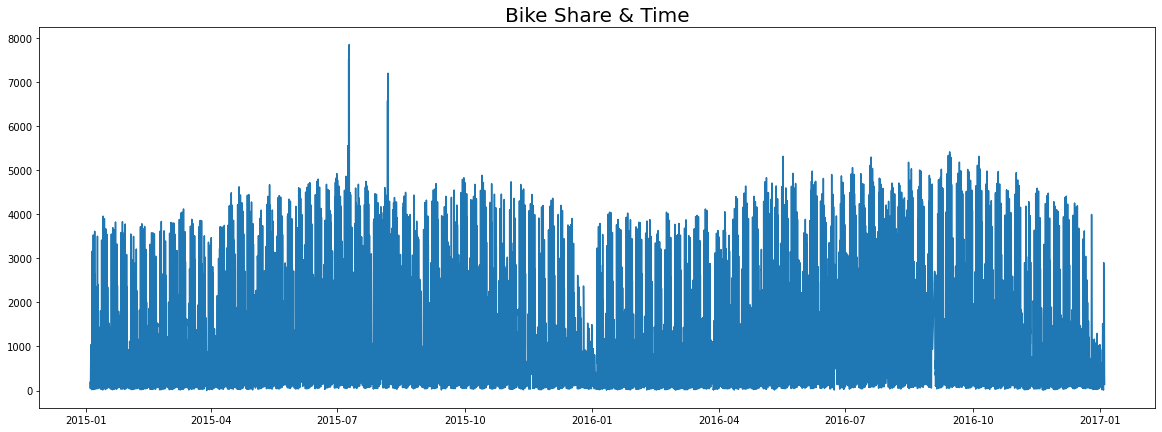

In [13]:
    datetime = df.index.values
    cnt  = df['cnt'].values   
     
    plt.figure(figsize=(20,7))
    plt.plot(datetime, cnt)
    plt.title('Bike Share & Time',
              fontsize=20);


MODELING

In [14]:
#Fungsi window dataset 
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [15]:
#Split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cnt,datetime,test_size = 0.2, random_state = 0 , shuffle=False)
print(len(x_train), len(x_test))

13931 3483


In [16]:
# Pembuatan model sequential
from keras.layers import Dense, LSTM

data_x_train = windowed_dataset(x_train, window_size=60, batch_size=80, shuffle_buffer=1000)
data_x_test = windowed_dataset(x_test, window_size=60, batch_size=80, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [17]:
#MAE yang diharapkan Cnt,(nilai max - nilai min)*10%
x = (7860 - 0) * (10 / 100)
print(x)

786.0


In [18]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if((logs.get('mae')< x)and (logs.get('val_mae')< x)):
       print("\nMAE & Val_MAE of the model < 10% of data scale")
       self.model.stop_training = True
callbacks = myCallback()

In [19]:
tf.keras.backend.set_floatx('float64')
history = model.fit(data_x_train ,epochs=100, validation_data=data_x_test, callbacks=[callbacks])

Epoch 1/100
174/174 [==============================] - 10s 25ms/step - loss: 1161.6213 - mae: 1162.1211 - val_loss: 1183.5518 - val_mae: 1184.0516
Epoch 2/100
174/174 [==============================] - 3s 19ms/step - loss: 1120.3953 - mae: 1120.8952 - val_loss: 1149.7379 - val_mae: 1150.2378
Epoch 3/100
174/174 [==============================] - 4s 20ms/step - loss: 1093.6830 - mae: 1094.1826 - val_loss: 1129.3185 - val_mae: 1129.8182
Epoch 4/100
174/174 [==============================] - 4s 19ms/step - loss: 1076.6409 - mae: 1077.1400 - val_loss: 1114.7183 - val_mae: 1115.2177
Epoch 5/100
174/174 [==============================] - 4s 20ms/step - loss: 1063.3154 - mae: 1063.8152 - val_loss: 1102.0355 - val_mae: 1102.5347
Epoch 6/100
174/174 [==============================] - 4s 20ms/step - loss: 1051.6646 - mae: 1052.1635 - val_loss: 1090.7339 - val_mae: 1091.2331
Epoch 7/100
174/174 [==============================] - 4s 20ms/step - loss: 1041.4886 - mae: 1041.9880 - val_loss: 1080.780

PLOT LOSS & MAE

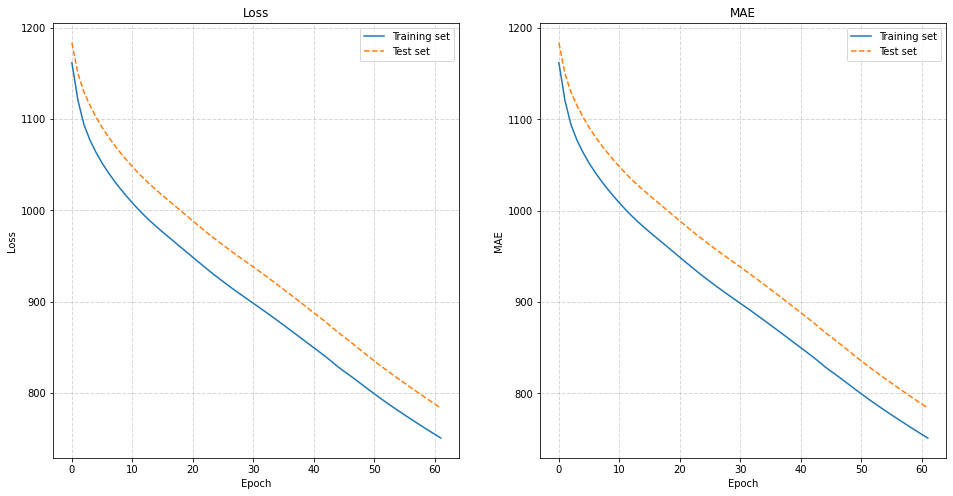

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss, label='Training set')
plt.plot(val_loss, label='Test set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.subplot(1, 2, 2)
plt.title('MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(mae, label='Training set')
plt.plot(val_mae, label='Test set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.show()